In [1]:
import warnings
warnings.simplefilter(action='ignore')

In [2]:
#Data preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [51]:
#Models and their evaluations
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.svm import OneClassSVM
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, make_scorer, precision_score, recall_score

In [4]:
#visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#other important librares
import numpy as np
import shap

# Supervised Learning

## TRAFFIC WITH SYNTHETIC ATTACKS

In [6]:
#Data pre-processing
file_path = 'csv\\augmented_traffic_with_synthetic_attacks.csv'
data = pd.read_csv(file_path)

label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])
data['protocol'] = label_encoder.fit_transform(data['protocol'])  
data['flags'] = label_encoder.fit_transform(data['flags']) 

features = ['src_port', 'dst_port', 'length', 'flags', 'protocol']
X = data[features]
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Random Forest

In [7]:
#Random Forest
param_grid = {
    'n_estimators': [10, 30, 50, 100, 200],
    'max_depth': [None, 10, 20, 30, 50], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4], 
    'max_features': ['sqrt', 'log2', None]
}

rf_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)

optimized_rf_model = RandomForestClassifier(**best_params, random_state=42)
optimized_rf_model.fit(X_train, y_train)

y_pred = optimized_rf_model.predict(X_test)

Fitting 5 folds for each of 675 candidates, totalling 3375 fits
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 10}
Best Cross-Validation Accuracy: 0.9857389496679175


In [8]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:",conf_matrix)

Accuracy: 0.9899328859060402
Confusion Matrix: [[295   5]
 [  1 295]]


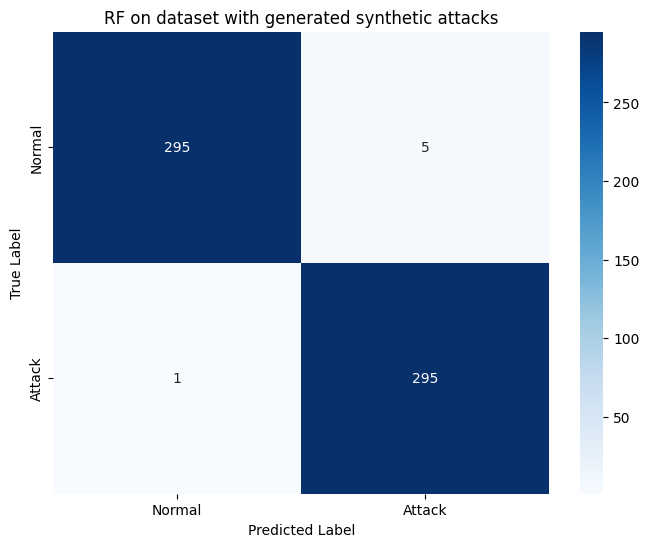

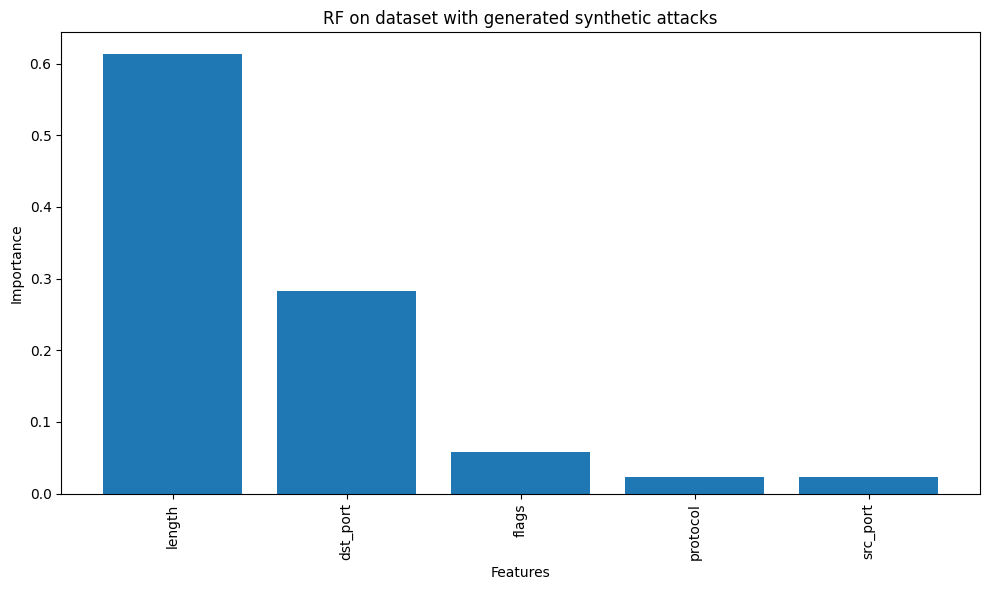

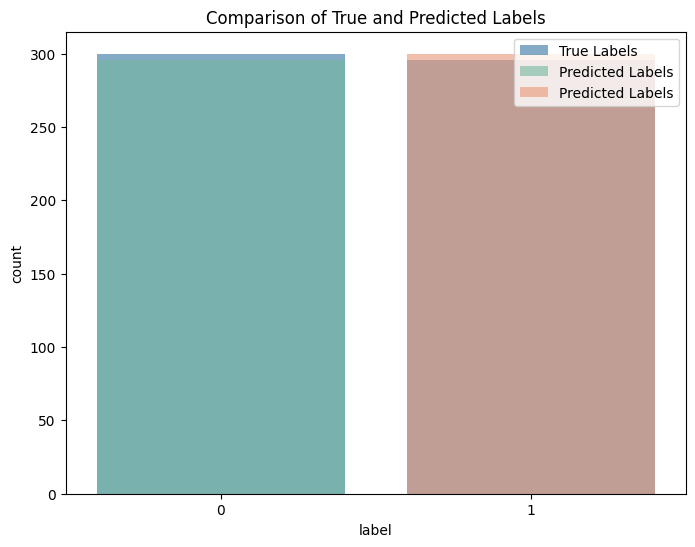

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("RF on dataset with generated synthetic attacks")
plt.show()

feature_importances = optimized_rf_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.title("RF on dataset with generated synthetic attacks")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x=y_test, label="True Labels", alpha=0.6)
sns.countplot(x=y_pred, label="Predicted Labels", alpha=0.6, palette="Set2")
plt.legend()
plt.title("Comparison of True and Predicted Labels")
plt.show()

### Support Vector Machine

In [10]:
#SVM
svm_model = SVC(kernel='linear', random_state=42)  # 'linear', 'rbf', stb. kernel választható
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

In [11]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:",conf_matrix)

Accuracy: 0.7718120805369127
Confusion Matrix: [[187 113]
 [ 23 273]]


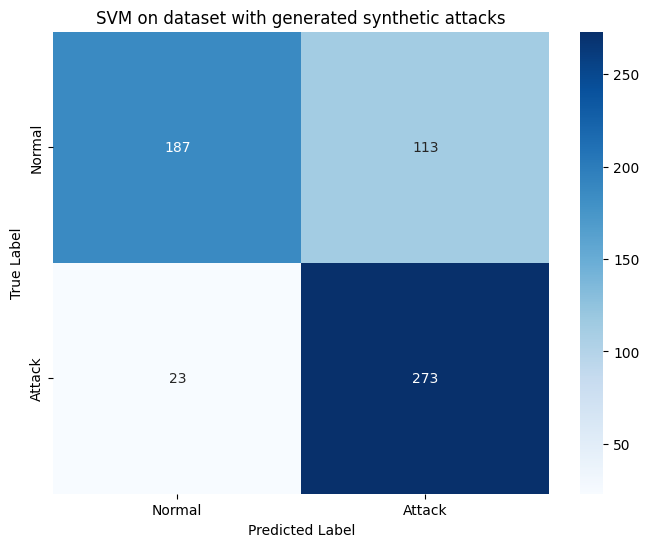

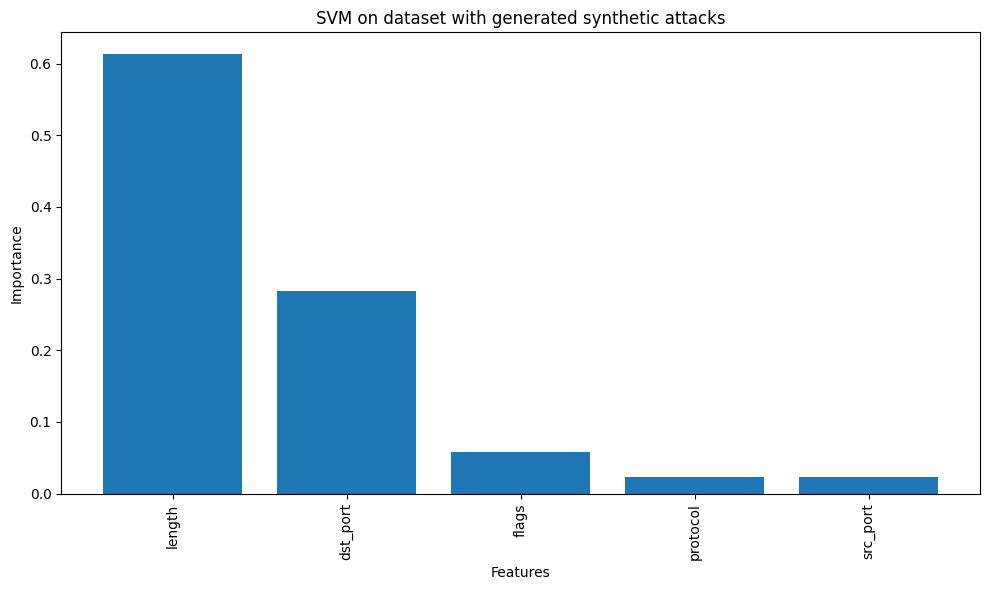

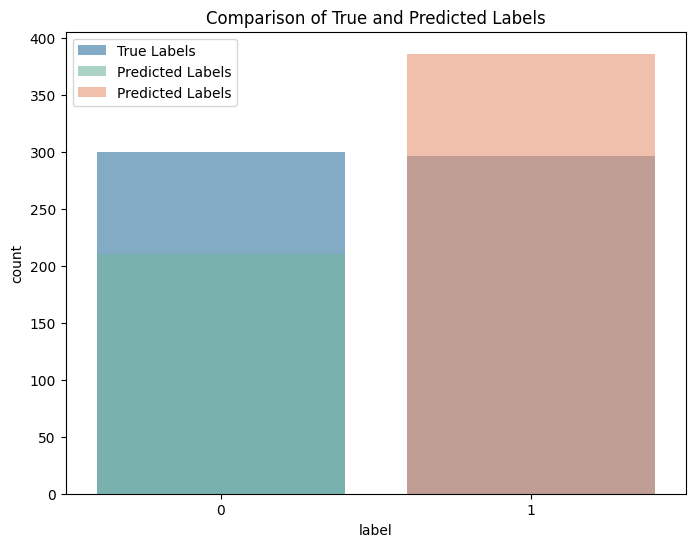

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("SVM on dataset with generated synthetic attacks")
plt.show()

feature_importances = optimized_rf_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.title("SVM on dataset with generated synthetic attacks")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x=y_test, label="True Labels", alpha=0.6)
sns.countplot(x=y_pred, label="Predicted Labels", alpha=0.6, palette="Set2")
plt.legend()
plt.title("Comparison of True and Predicted Labels")
plt.show()

### Gradient Boosting Machine

In [13]:
#GBM
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

gbm = GradientBoostingClassifier(random_state=42)

grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)

optimized_gbm_model = GradientBoostingClassifier(**best_params, random_state=42)
optimized_gbm_model.fit(X_train, y_train)

y_pred = optimized_gbm_model.predict(X_test)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.9853196624561775


In [14]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:",conf_matrix)

Accuracy: 0.988255033557047
Confusion Matrix: [[295   5]
 [  2 294]]


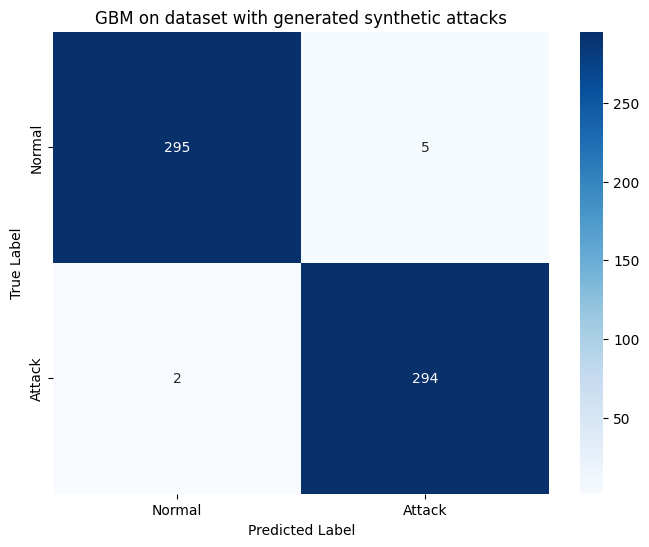

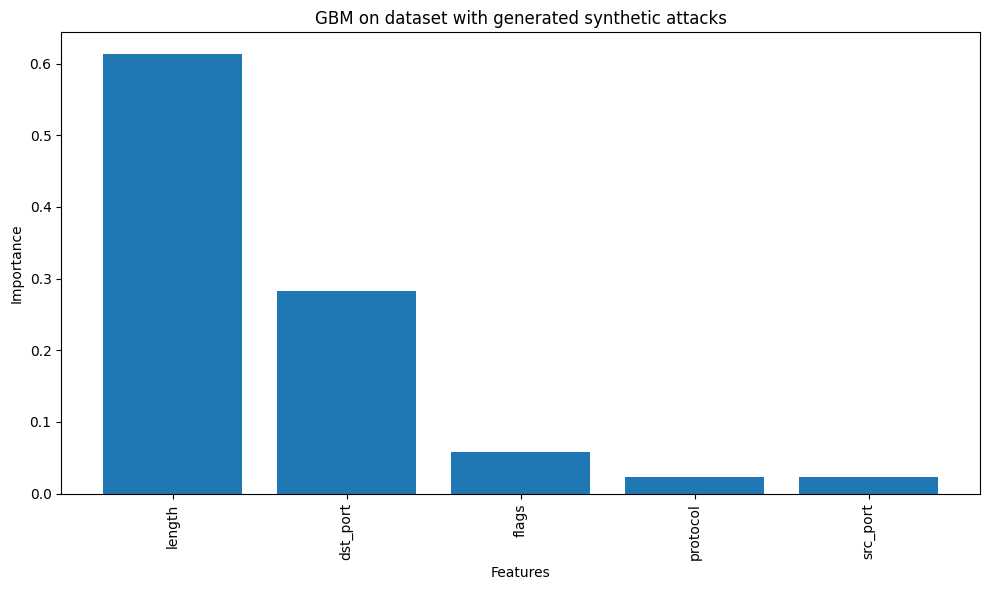

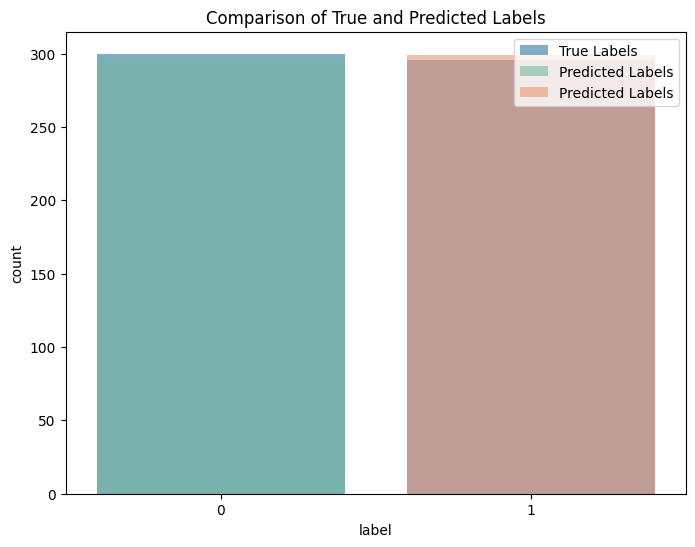

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("GBM on dataset with generated synthetic attacks")
plt.show()

feature_importances = optimized_rf_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.title("GBM on dataset with generated synthetic attacks")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x=y_test, label="True Labels", alpha=0.6)
sns.countplot(x=y_pred, label="Predicted Labels", alpha=0.6, palette="Set2")
plt.legend()
plt.title("Comparison of True and Predicted Labels")
plt.show()

## TRAFFIC WITH ATTACKS FROM UNSW-NB15 DATASET

In [16]:
#Data pre-processing
file_path = 'csv\\augmented_with_unsw_nb15_attacks.csv'
data = pd.read_csv(file_path)

label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])
data['protocol'] = label_encoder.fit_transform(data['protocol'])  
data['flags'] = label_encoder.fit_transform(data['flags']) 

features = ['src_port', 'dst_port', 'length', 'flags', 'protocol']
X = data[features]
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Random Forest

In [17]:
#Random Forest
param_grid = {
    'n_estimators': [10, 30, 50, 100, 200],
    'max_depth': [None, 10, 20, 30, 50], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4], 
    'max_features': ['sqrt', 'log2', None]
}

rf_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)

optimized_rf_model = RandomForestClassifier(**best_params, random_state=42)
optimized_rf_model.fit(X_train, y_train)

y_pred = optimized_rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy with Optimized Model:", test_accuracy)

Fitting 5 folds for each of 675 candidates, totalling 3375 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Best Cross-Validation Accuracy: 1.0
Test Accuracy with Optimized Model: 1.0


In [18]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:",conf_matrix)

Accuracy: 1.0
Confusion Matrix: [[500   0]
 [  0 296]]


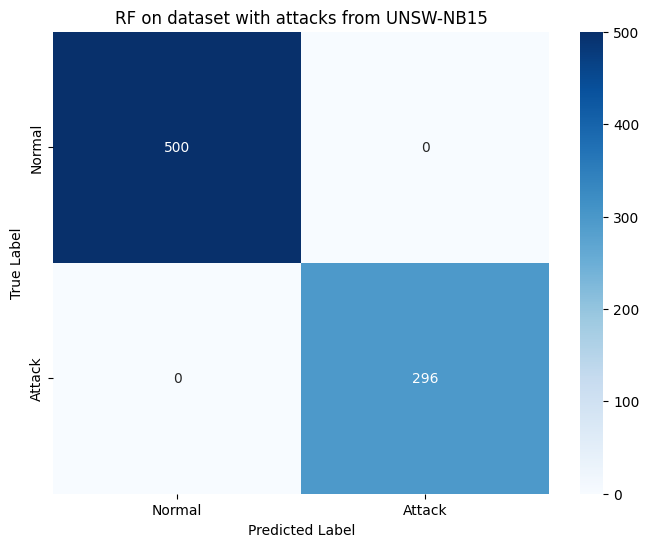

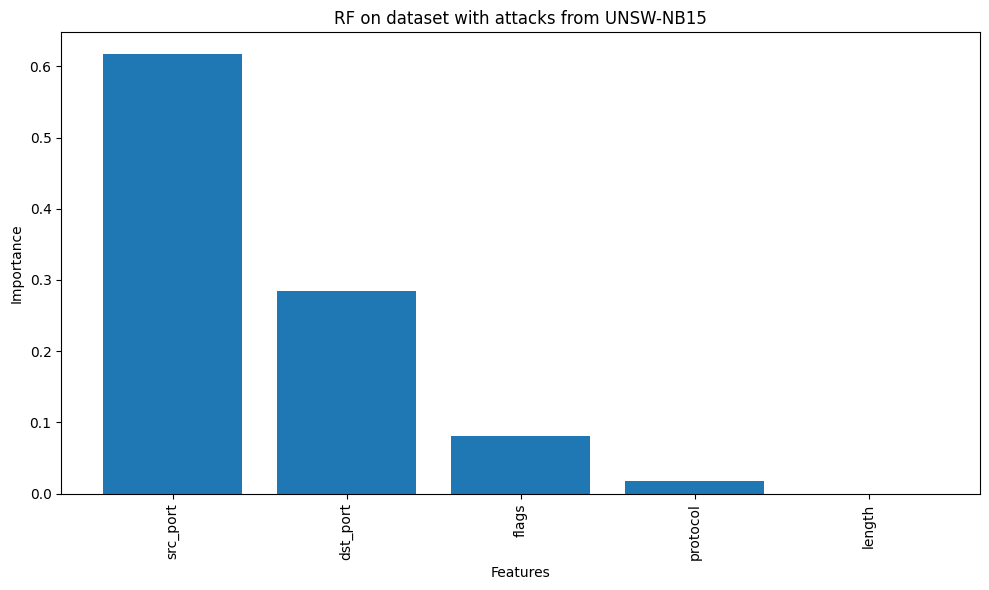

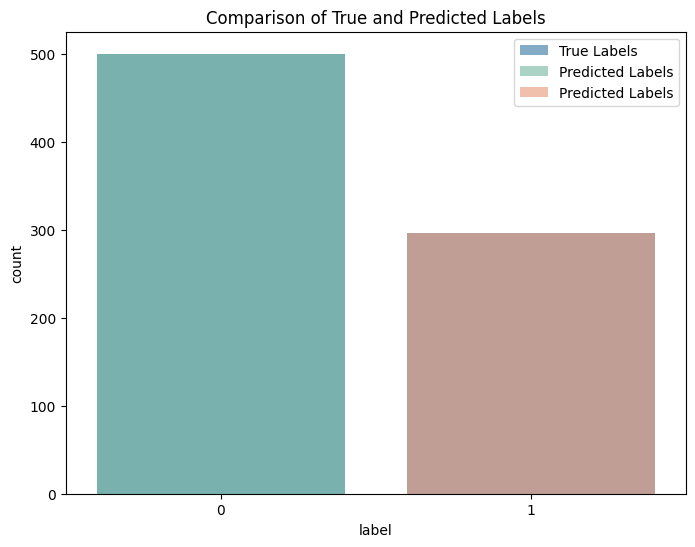

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("RF on dataset with attacks from UNSW-NB15")
plt.show()

feature_importances = optimized_rf_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.title("RF on dataset with attacks from UNSW-NB15")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x=y_test, label="True Labels", alpha=0.6)
sns.countplot(x=y_pred, label="Predicted Labels", alpha=0.6, palette="Set2")
plt.legend()
plt.title("Comparison of True and Predicted Labels")
plt.show()

### Support Vector Machine

In [20]:
#SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

In [21]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:",conf_matrix)

Accuracy: 1.0
Confusion Matrix: [[500   0]
 [  0 296]]


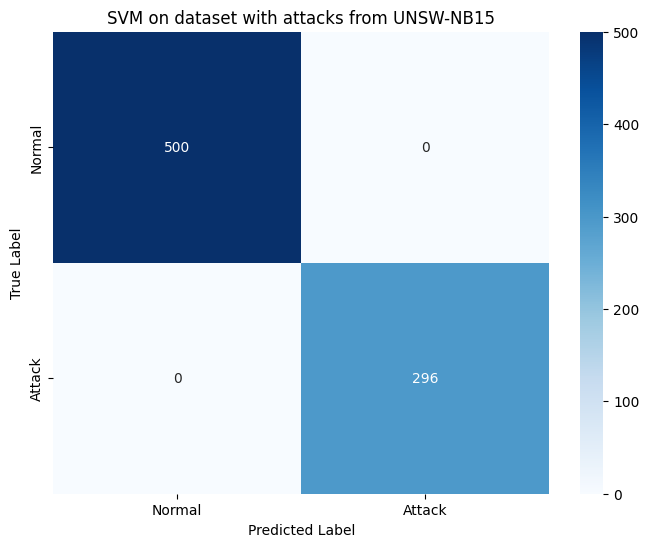

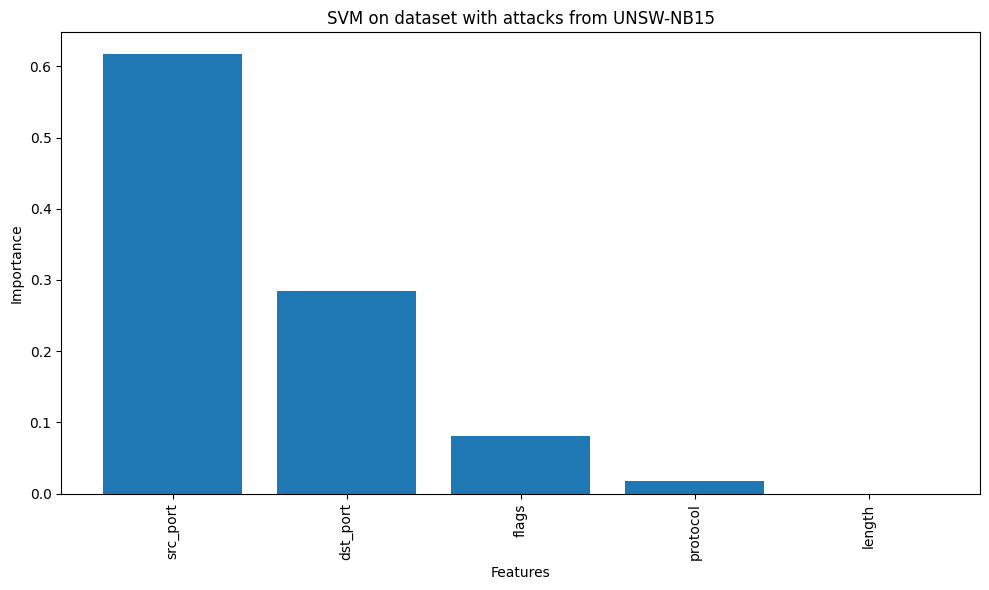

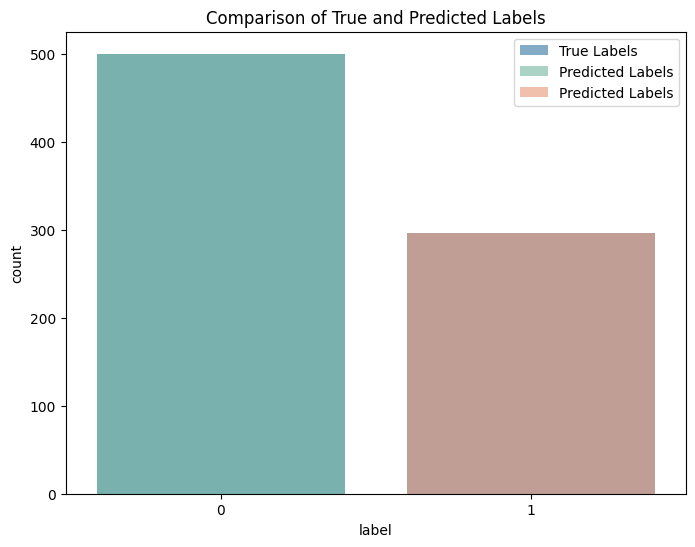

In [22]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("SVM on dataset with attacks from UNSW-NB15")
plt.show()

feature_importances = optimized_rf_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.title("SVM on dataset with attacks from UNSW-NB15")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x=y_test, label="True Labels", alpha=0.6)
sns.countplot(x=y_pred, label="Predicted Labels", alpha=0.6, palette="Set2")
plt.legend()
plt.title("Comparison of True and Predicted Labels")
plt.show()

### Gradient Boosting Machine

In [23]:
#GBM
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

gbm = GradientBoostingClassifier(random_state=42)

grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)

optimized_gbm_model = GradientBoostingClassifier(**best_params, random_state=42)
optimized_gbm_model.fit(X_train, y_train)

y_pred = optimized_gbm_model.predict(X_test)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation Accuracy: 1.0


In [24]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:",conf_matrix)

Accuracy: 1.0
Confusion Matrix: [[500   0]
 [  0 296]]


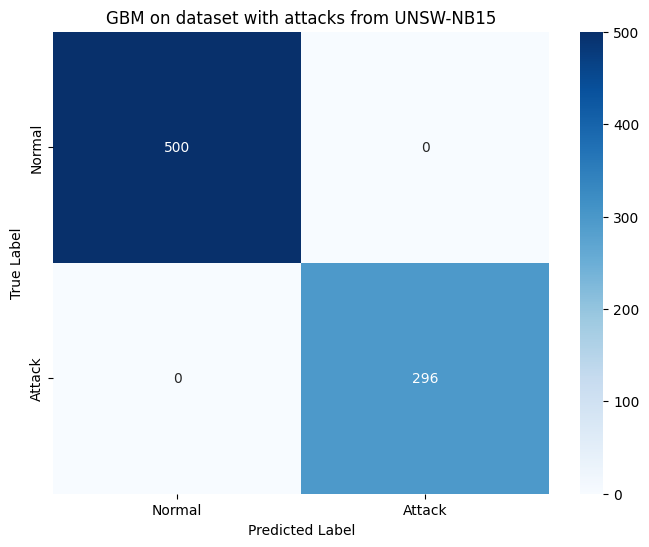

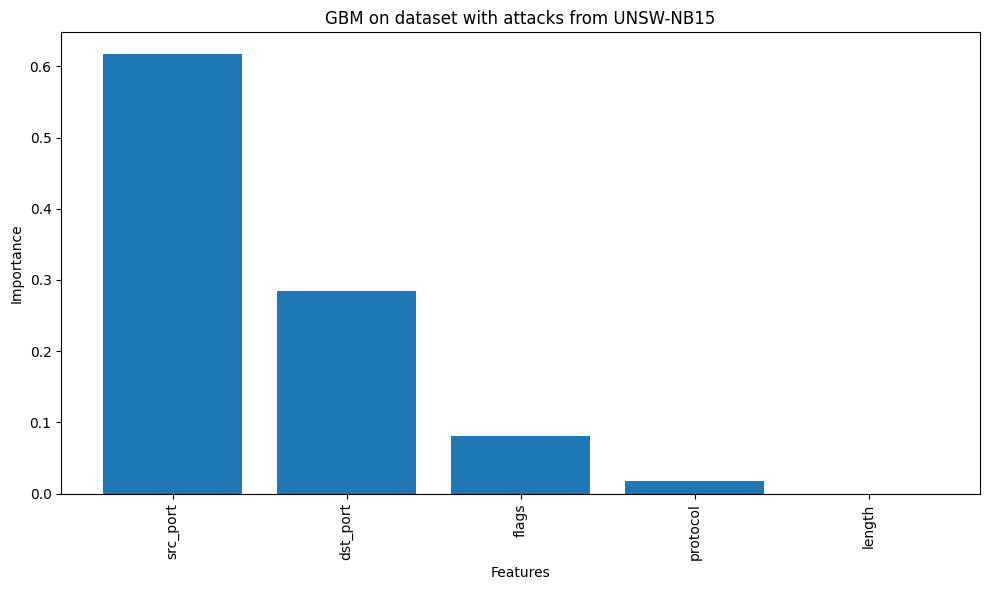

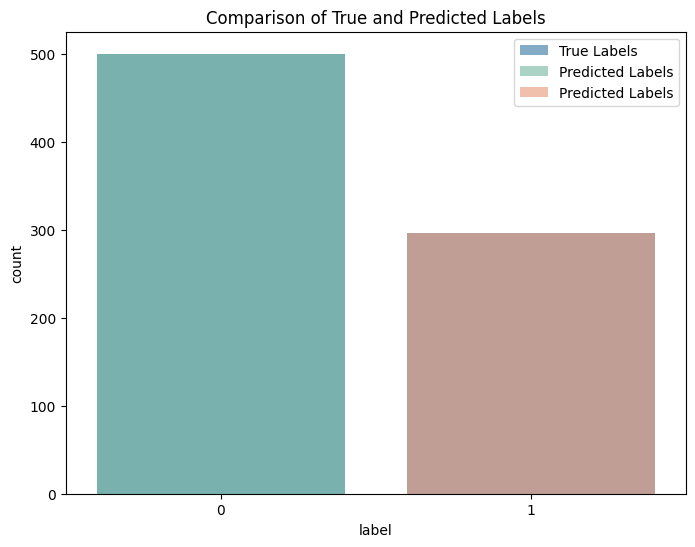

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("GBM on dataset with attacks from UNSW-NB15")
plt.show()

feature_importances = optimized_rf_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.title("GBM on dataset with attacks from UNSW-NB15")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x=y_test, label="True Labels", alpha=0.6)
sns.countplot(x=y_pred, label="Predicted Labels", alpha=0.6, palette="Set2")
plt.legend()
plt.title("Comparison of True and Predicted Labels")
plt.show()

## AUGMENTED TRAFFIC WITH DATA FROM UNSW-NB15 DATASET

In [26]:
#Data pre-processing
file_path = 'csv\\augmented_with_unsw_nb15.csv'
data = pd.read_csv(file_path)

label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])
data['protocol'] = label_encoder.fit_transform(data['protocol'])  
data['flags'] = label_encoder.fit_transform(data['flags']) 

features = ['src_port', 'dst_port', 'length', 'flags', 'protocol']
X = data[features]
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Random Forest

In [27]:
#Random Forest
param_grid = {
    'n_estimators': [10, 30, 50, 100, 200],
    'max_depth': [None, 10, 20, 30, 50], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4], 
    'max_features': ['sqrt', 'log2', None]
}

rf_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)

optimized_rf_model = RandomForestClassifier(**best_params, random_state=42)
optimized_rf_model.fit(X_train, y_train)

y_pred = optimized_rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy with Optimized Model:", test_accuracy)

Fitting 5 folds for each of 675 candidates, totalling 3375 fits
Best Parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.9006018171156913
Test Accuracy with Optimized Model: 0.9046184738955824


In [28]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:",conf_matrix)

Accuracy: 0.9046184738955824
Confusion Matrix: [[452  48]
 [ 47 449]]


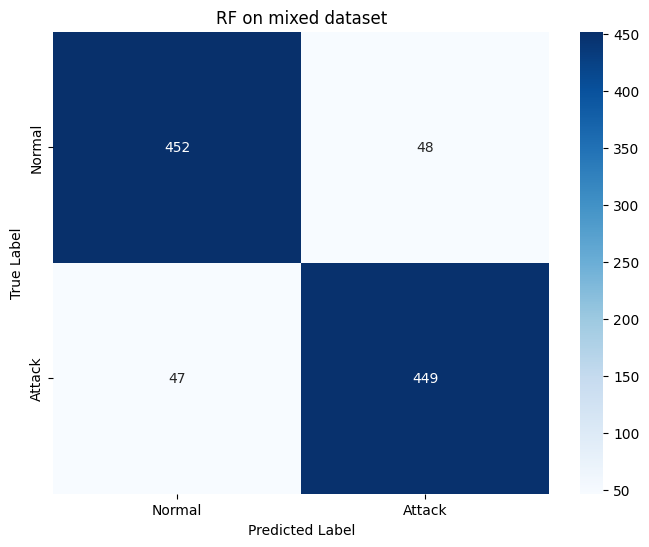

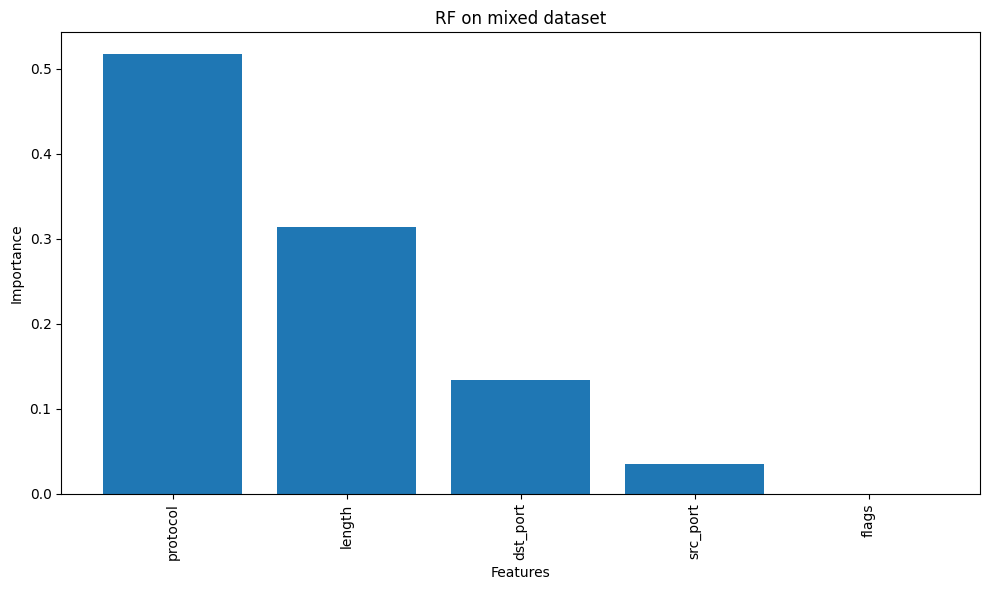

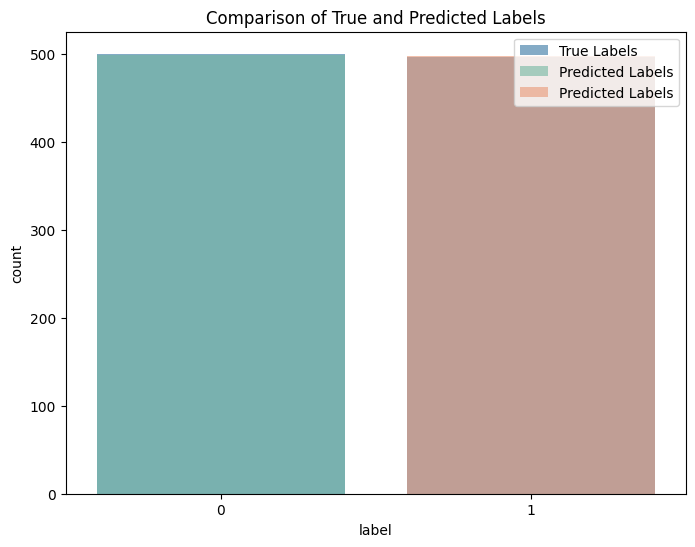

In [29]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("RF on mixed dataset")
plt.show()

feature_importances = optimized_rf_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.title("RF on mixed dataset")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x=y_test, label="True Labels", alpha=0.6)
sns.countplot(x=y_pred, label="Predicted Labels", alpha=0.6, palette="Set2")
plt.legend()
plt.title("Comparison of True and Predicted Labels")
plt.show()

### Support Vector Machine

In [30]:
#SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

In [31]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:",conf_matrix)

Accuracy: 0.7981927710843374
Confusion Matrix: [[443  57]
 [144 352]]


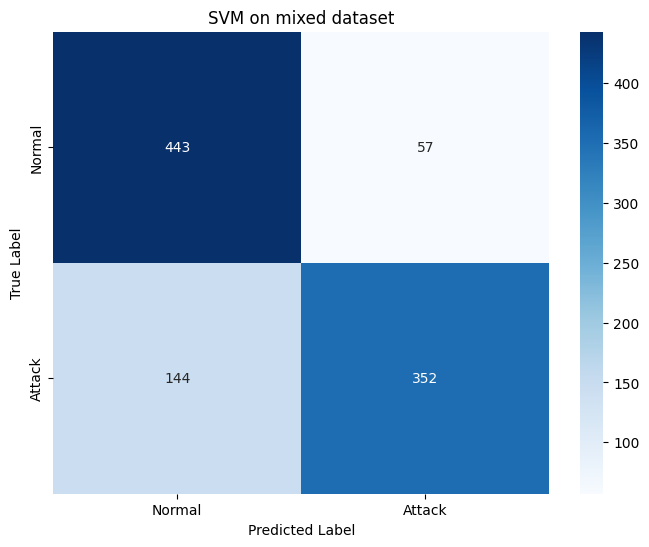

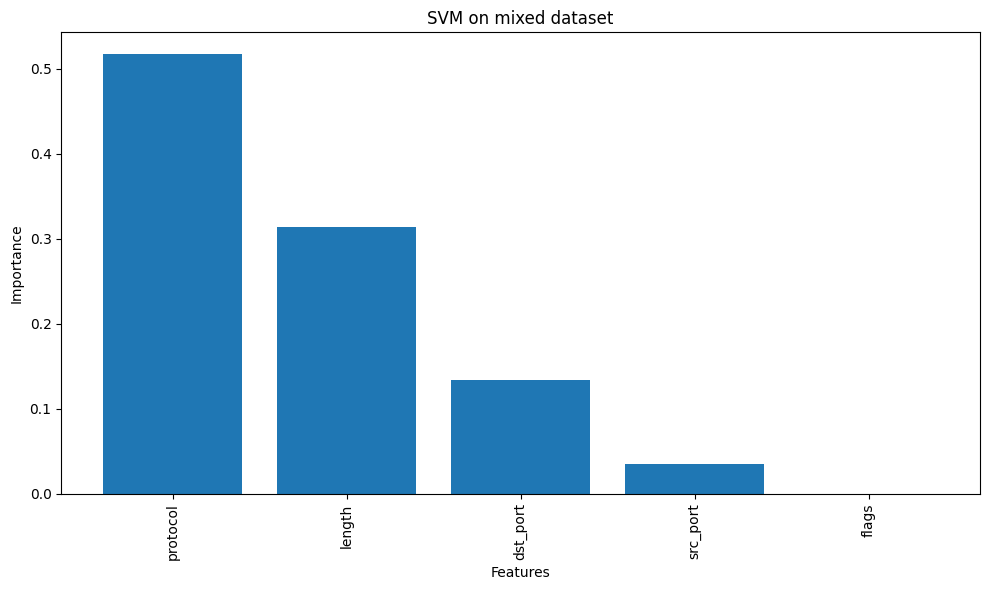

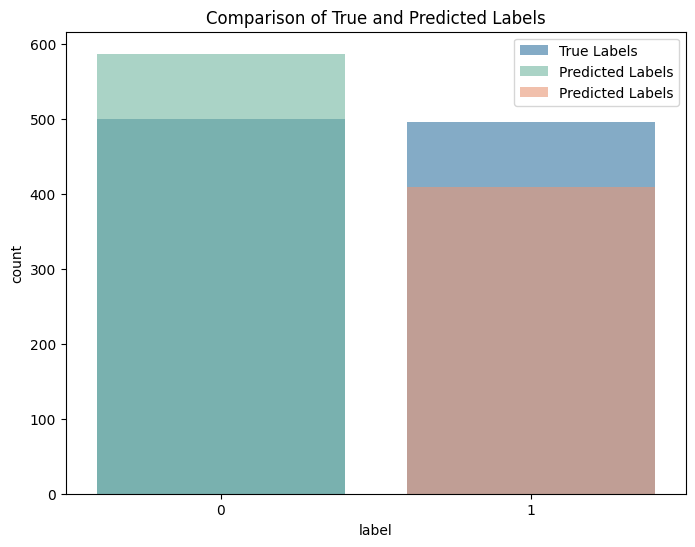

In [32]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("SVM on mixed dataset")
plt.show()

feature_importances = optimized_rf_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.title("SVM on mixed dataset")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x=y_test, label="True Labels", alpha=0.6)
sns.countplot(x=y_pred, label="Predicted Labels", alpha=0.6, palette="Set2")
plt.legend()
plt.title("Comparison of True and Predicted Labels")
plt.show()

### Gradient Boosting Machine

In [33]:
#GBM
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

gbm = GradientBoostingClassifier(random_state=42)

grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)

optimized_gbm_model = GradientBoostingClassifier(**best_params, random_state=42)
optimized_gbm_model.fit(X_train, y_train)

y_pred = optimized_gbm_model.predict(X_test)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.9053709576741928


In [34]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:",conf_matrix)

Accuracy: 0.9046184738955824
Confusion Matrix: [[465  35]
 [ 60 436]]


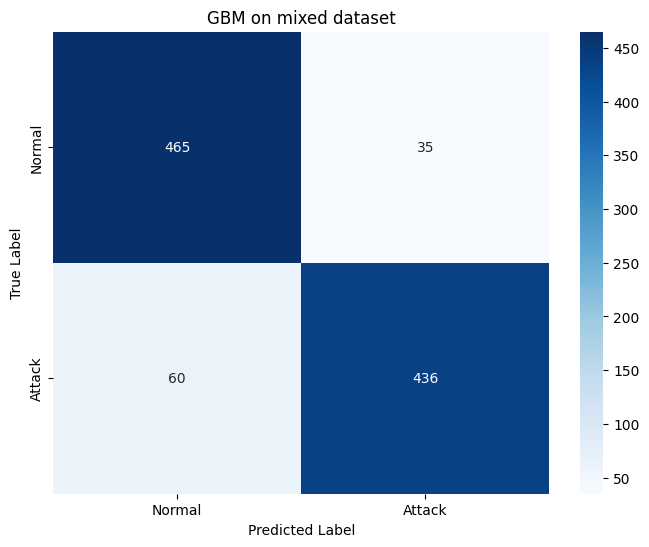

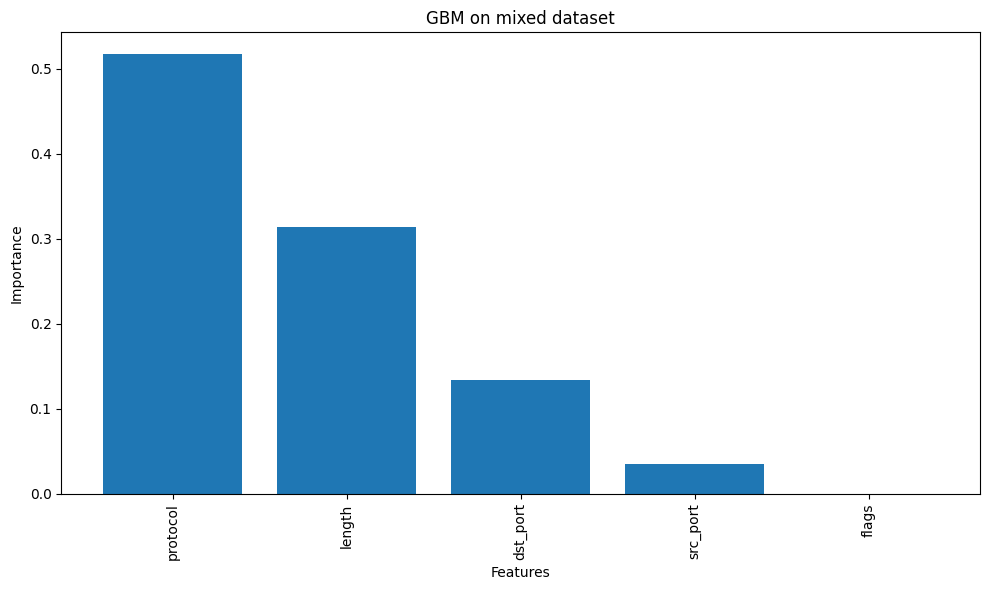

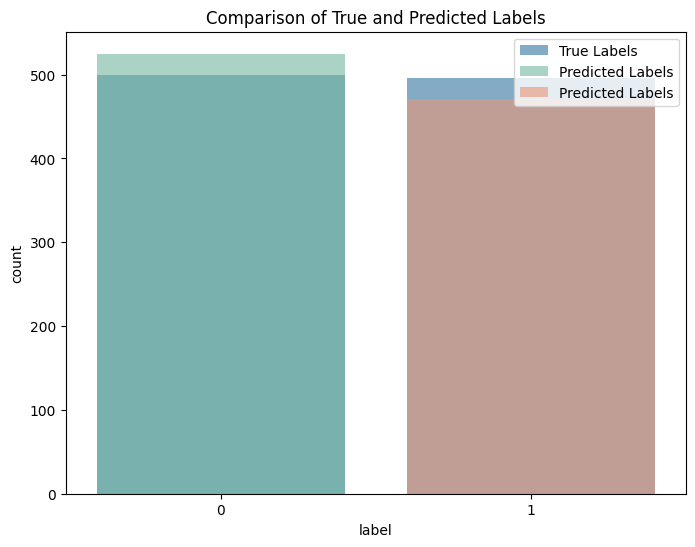

In [35]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("GBM on mixed dataset")
plt.show()

feature_importances = optimized_rf_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.title("GBM on mixed dataset")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x=y_test, label="True Labels", alpha=0.6)
sns.countplot(x=y_pred, label="Predicted Labels", alpha=0.6, palette="Set2")
plt.legend()
plt.title("Comparison of True and Predicted Labels")
plt.show()

# Semi-Unsupervised Learning

## ORIGINAL TRAFFIC DATASET

### One-Class Support Vector Machine

In [36]:
def custom_f1_score(y_true, y_pred):
    # Convert predictions to the expected labels (1 for normal, -1 for anomalies)
    return f1_score(y_true, y_pred, average='macro')

file_path = 'csv\\traffic.csv'
data = pd.read_csv(file_path)

label_encoder = LabelEncoder()
data['protocol'] = label_encoder.fit_transform(data['protocol'])  
data['flags'] = label_encoder.fit_transform(data['flags']) 

features = ['src_port', 'dst_port', 'length', 'flags', 'protocol']
data_filtered = data[features].dropna()

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_filtered)

train_data = data_scaled[:int(0.8 * len(data_scaled))]
test_data = data_scaled[int(0.8 * len(data_scaled)):]

np.random.seed(42)
anomalies = np.random.uniform(low=train_data.min(), high=train_data.max(), size=(20, train_data.shape[1]))
test_data_with_anomalies = np.vstack([test_data, anomalies])

test_labels = np.hstack([np.ones(len(test_data)), -np.ones(len(anomalies))])

scorer = make_scorer(custom_f1_score, greater_is_better=True)

param_grid = {
    'gamma': [0.001, 0.01, 0.1, 1],
    'nu': [0.01, 0.05, 0.1, 0.2]
}

ocsvm = OneClassSVM(kernel='rbf')

grid_search = GridSearchCV(estimator=ocsvm, param_grid=param_grid, scoring=scorer, cv=3)

train_labels = np.ones(len(train_data))

grid_search.fit(train_data, train_labels)

print("Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_

predictions = best_model.predict(test_data_with_anomalies)

print("Classification Report:")
print(classification_report(test_labels, predictions, target_names=['Anomaly', 'Normal']))


Best Parameters: {'gamma': 0.01, 'nu': 0.01}
Classification Report:
              precision    recall  f1-score   support

     Anomaly       0.88      0.35      0.50        20
      Normal       0.96      1.00      0.98       296

    accuracy                           0.96       316
   macro avg       0.92      0.67      0.74       316
weighted avg       0.95      0.96      0.95       316



Using 1184 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|████████████████████████████████████████████████████████████████████████████████| 316/316 [03:52<00:00,  1.36it/s]


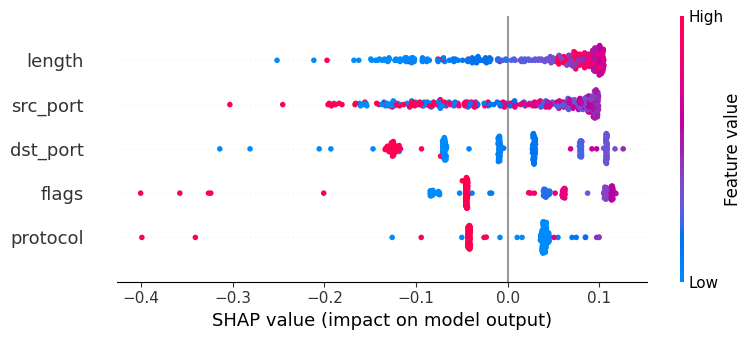

In [37]:
explainer = shap.KernelExplainer(best_model.decision_function, train_data)

shap_values = explainer.shap_values(test_data_with_anomalies)

shap.summary_plot(shap_values, test_data_with_anomalies, feature_names=features)

Best Parameters: {'gamma': 0.1, 'nu': 0.01}
Classification Report:
              precision    recall  f1-score   support

     Anomaly       0.50      0.05      0.09        20
      Normal       0.94      1.00      0.97       296

    accuracy                           0.94       316
   macro avg       0.72      0.52      0.53       316
weighted avg       0.91      0.94      0.91       316



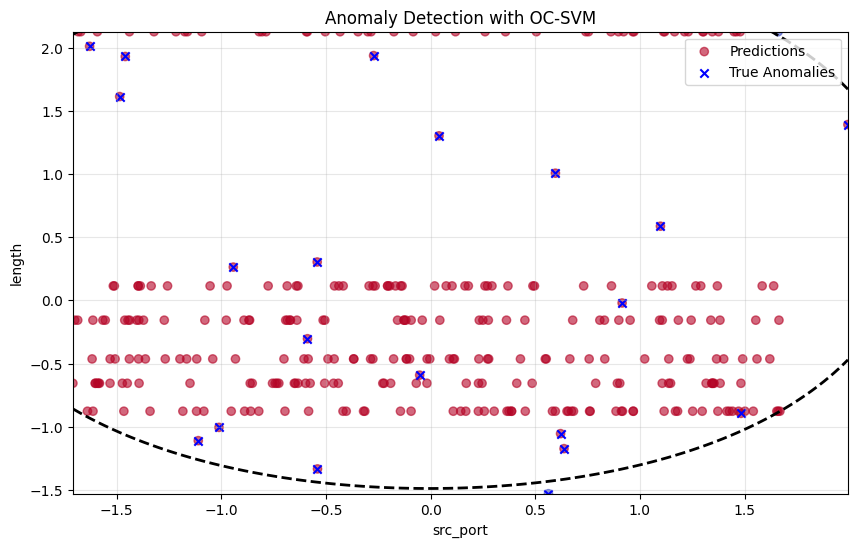

In [45]:
file_path = 'csv\\traffic.csv'
data = pd.read_csv(file_path)

label_encoder = LabelEncoder()
data['protocol'] = label_encoder.fit_transform(data['protocol'])  
data['flags'] = label_encoder.fit_transform(data['flags']) 

features = ['src_port', 'dst_port']
data_filtered = data[features].dropna()

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_filtered)

train_data = data_scaled[:int(0.8 * len(data_scaled))]
test_data = data_scaled[int(0.8 * len(data_scaled)):]

np.random.seed(42)
anomalies = np.random.uniform(low=train_data.min(), high=train_data.max(), size=(20, train_data.shape[1]))
test_data_with_anomalies = np.vstack([test_data, anomalies])

test_labels = np.hstack([np.ones(len(test_data)), -np.ones(len(anomalies))])

def custom_f1_score(y_true, y_pred):
    return f1_score(y_true, y_pred, average='macro')

scorer = make_scorer(custom_f1_score, greater_is_better=True)

param_grid = {
    'gamma': [0.001, 0.01, 0.1, 1],
    'nu': [0.01, 0.05, 0.1, 0.2]
}
ocsvm = OneClassSVM(kernel='rbf')
grid_search = GridSearchCV(estimator=ocsvm, param_grid=param_grid, scoring=scorer, cv=3)

train_labels = np.ones(len(train_data))

grid_search.fit(train_data, train_labels)
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

predictions = best_model.predict(test_data_with_anomalies)

print("Classification Report:")
print(classification_report(test_labels, predictions, target_names=['Anomaly', 'Normal']))

plt.figure(figsize=(10, 6))

plt.scatter(test_data_with_anomalies[:, 0], test_data_with_anomalies[:, 1],
            c=predictions, cmap='coolwarm', marker='o', label='Predictions', alpha=0.6)

plt.scatter(test_data_with_anomalies[test_labels == -1][:, 0],
            test_data_with_anomalies[test_labels == -1][:, 1],
            color='blue', edgecolor='k', marker='x', label='True Anomalies')

xx, yy = np.meshgrid(np.linspace(test_data_with_anomalies[:, 0].min(), test_data_with_anomalies[:, 0].max(), 100),
                     np.linspace(test_data_with_anomalies[:, 1].min(), test_data_with_anomalies[:, 1].max(), 100))
Z = best_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black', linestyles='--')

plt.title('Anomaly Detection with OC-SVM')
plt.xlabel('src_port')
plt.ylabel('length')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Unsupervised Learning

## ORIGINAL TRAFFIC DATASET

### Autoencoders

Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 1.0004 - val_loss: 0.8994
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8573 - val_loss: 0.8232
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.7831 - val_loss: 0.7602
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7182 - val_loss: 0.7043
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6752 - val_loss: 0.6450
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6260 - val_loss: 0.5753
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5461 - val_loss: 0.5037
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4677 - val_loss: 0.4473
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4298 - val_loss: 0.4022
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3771 - val_loss: 0.3616
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3396 - val_loss: 0.3252
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2982 - va

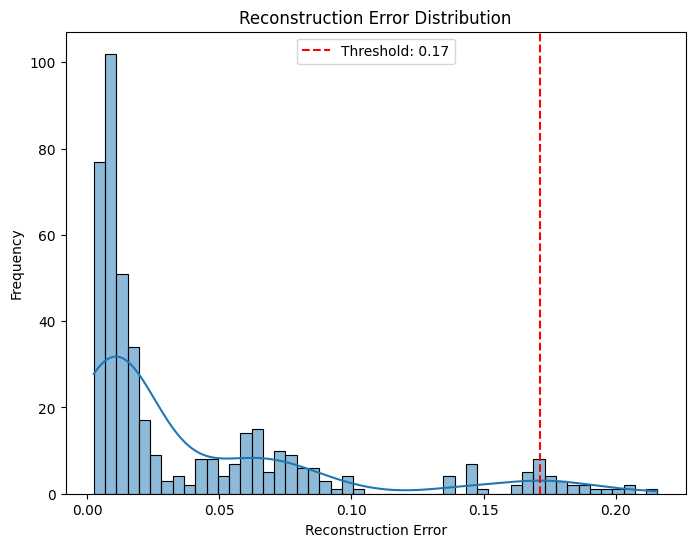

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Number of Anomalies: 74
Number of Normal data: 1406


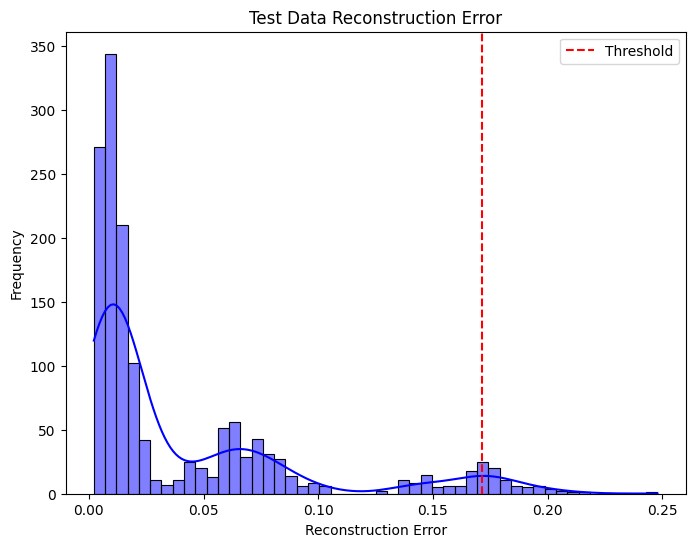

In [52]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

file_path = 'csv\\traffic.csv'
data = pd.read_csv(file_path)

relevant_columns = ['src_port', 'dst_port', 'length', 'protocol','flags']
data_normal = data[relevant_columns]

label_encoder = LabelEncoder()
if 'protocol' in data_normal.columns:
    data_normal['protocol'] = label_encoder.fit_transform(data_normal['protocol'])

if 'flags' in data_normal.columns:
    data_normal['flags'] = label_encoder.fit_transform(data_normal['flags'])

scaler = StandardScaler()
data_normal_scaled = scaler.fit_transform(data_normal)

X_train, X_val = train_test_split(data_normal_scaled, test_size=0.3, random_state=42)

input_dim = X_train.shape[1]

input_layer = Input(shape=(input_dim,))
encoder = Dense(8, activation="relu")(input_layer)
bottleneck = Dense(4, activation="relu")(encoder)
decoder = Dense(8, activation="relu")(bottleneck)
output_layer = Dense(input_dim, activation="linear")(decoder)

autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer='adam', loss='mse')

history = autoencoder.fit(
    X_train, X_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, X_val),
    verbose=1
)

X_val_reconstructed = autoencoder.predict(X_val)
reconstruction_error = np.mean(np.square(X_val - X_val_reconstructed), axis=1)

threshold = np.percentile(reconstruction_error, 95)

print(f"Küszöbérték a hiba alapján: {threshold}")

plt.figure(figsize=(8, 6))
sns.histplot(reconstruction_error, bins=50, kde=True)
plt.axvline(threshold, color='r', linestyle='--', label=f'Threshold: {threshold:.2f}')
plt.title("Reconstruction Error Distribution")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.legend()
plt.show()

X_test_reconstructed = autoencoder.predict(data_normal_scaled)
test_reconstruction_error = np.mean(np.square(data_normal_scaled - X_test_reconstructed), axis=1)

anomalies = test_reconstruction_error > threshold
print(f"Number of Anomalies: {np.sum(anomalies)}")
print(f"Number of Normal data: {len(test_reconstruction_error) - np.sum(anomalies)}")

plt.figure(figsize=(8, 6))
sns.histplot(test_reconstruction_error, bins=50, kde=True, color='blue')
plt.axvline(threshold, color='r', linestyle='--', label='Threshold')
plt.title("Test Data Reconstruction Error")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.legend()
plt.show()



Metrics for Test Data:
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
Accuracy: 1.00

Confusion Matrix:
[[  74    0]
 [   0 1406]]

Classification Report:
              precision    recall  f1-score   support

     Anomaly       1.00      1.00      1.00        74
      Normal       1.00      1.00      1.00      1406

    accuracy                           1.00      1480
   macro avg       1.00      1.00      1.00      1480
weighted avg       1.00      1.00      1.00      1480



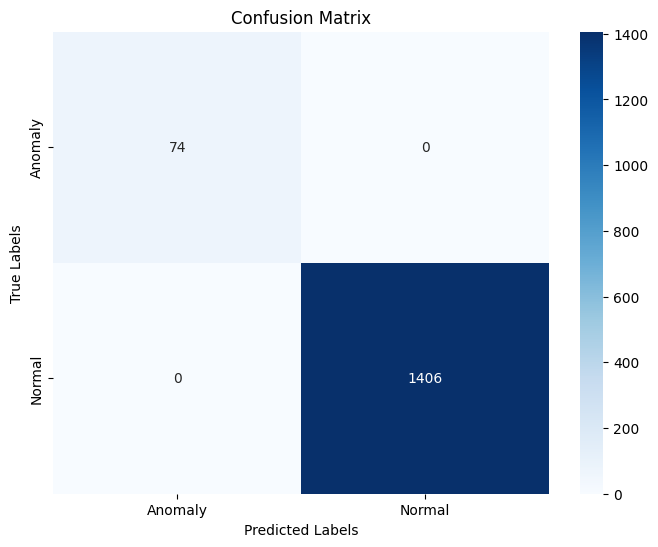

In [53]:
true_labels = np.ones(len(test_reconstruction_error))  
true_labels[anomalies] = -1

predicted_labels = np.ones(len(test_reconstruction_error)) 
predicted_labels[test_reconstruction_error > threshold] = -1 

precision = precision_score(true_labels, predicted_labels, pos_label=1)
recall = recall_score(true_labels, predicted_labels, pos_label=1)
f1 = f1_score(true_labels, predicted_labels, pos_label=1)
accuracy = accuracy_score(true_labels, predicted_labels)

print("\nMetrics for Test Data:")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")

conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels, target_names=["Anomaly", "Normal"]))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Anomaly", "Normal"], yticklabels=["Anomaly", "Normal"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()